In [1]:
%load_ext autoreload
%matplotlib inline

In [22]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
from math import *
from ipywidgets import *
import ipywidgets as widgets

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'src')
functionsdir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['conditionalstats']
Own modules available: ['plot2D', 'plot1DInvLog']


# Test time evolution

In [15]:
Nt = 1000
t = np.linspace(0,4,Nt)
# store samples from normal distributions that vary in time
mu_t = t#+np.cos(2*pi*Nt*t)
std_t = 1+0.2*np.sin(2*pi*Nt*t)
x_norm = [np.random.normal(loc=mu_t[i_t],scale=std_t[i_t],size=100000) for i_t in range(Nt)]
x_norm = np.vstack(x_norm)
print("shape [Ntime x Nsamples]")
print(x_norm.shape)

shape [Ntime x Nsamples]
(1000, 100000)


In [24]:
dist_x_linear = DistributionOverTime(name='x',time_ref=t,nlb=50)
dist_x_linear.computeDistributions(sample=x_norm)

<IPython.core.display.Javascript object>


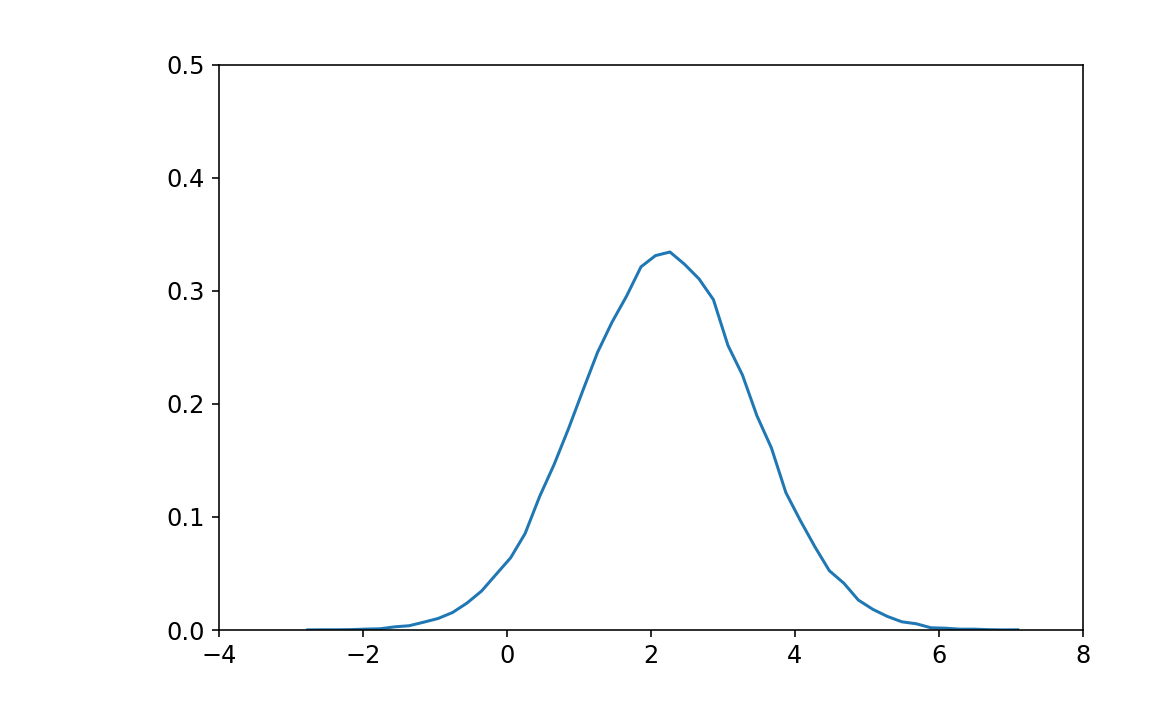

interactive(children=(IntSlider(value=0, description='Time', max=999), Output()), _dom_classes=('widget-intera…

In [25]:
%matplotlib nbagg

fig,ax = plt.subplots(figsize=(8,5))

def show(i_t):
    plt.cla()
    d = dist_x_linear.distributions[i_t]
    ax.plot(d.percentiles,d.density)
    ax.set_xlim((-4,8))
    ax.set_ylim((0,0.5))
    plt.show()

i_t = widgets.IntSlider(min=0,max=999,step=1,value=0,description='Time')

interact(show,i_t=i_t);